### Titanic Survival Analysis

#### Problem

Predict which passengers survived the Titanic shipwreck.

#### Initial assumptions for people who were more likely to survive

- People from higher socio-economic class
- Children and women
- People who were traveling with family

#### Data Loading and Exploration

In [1]:
import pandas as pd

train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [2]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
print('Train shape: ', train.shape)
print('Test shape: ', test.shape)

Train shape:  (891, 12)
Test shape:  (418, 11)


#### Data cleaning and processing

In [7]:
print(train.isnull().sum())

x_train = train.copy()

x_train['FamilySize'] = x_train['SibSp'] + x_train['Parch']
x_train.drop(['SibSp', 'Parch', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

x_train.dropna()

x_train.info()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     889 non-null    object 
 7   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [8]:
print(test.isnull().sum())

x_test = test.copy()

x_test['FamilySize'] = x_test['SibSp'] + x_test['Parch'] + 1
x_test.drop(['SibSp', 'Parch', 'Ticket', 'Cabin', 'Name'], axis=1, inplace=True)

x_test.dropna()

x_test.info()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    object 
 3   Age          332 non-null    float64
 4   Fare         417 non-null    float64
 5   Embarked     418 non-null    object 
 6   FamilySize   418 non-null    int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


#### Data visualization

Text(0.5, 1.0, 'Survival by Age, (1 = Survived)')

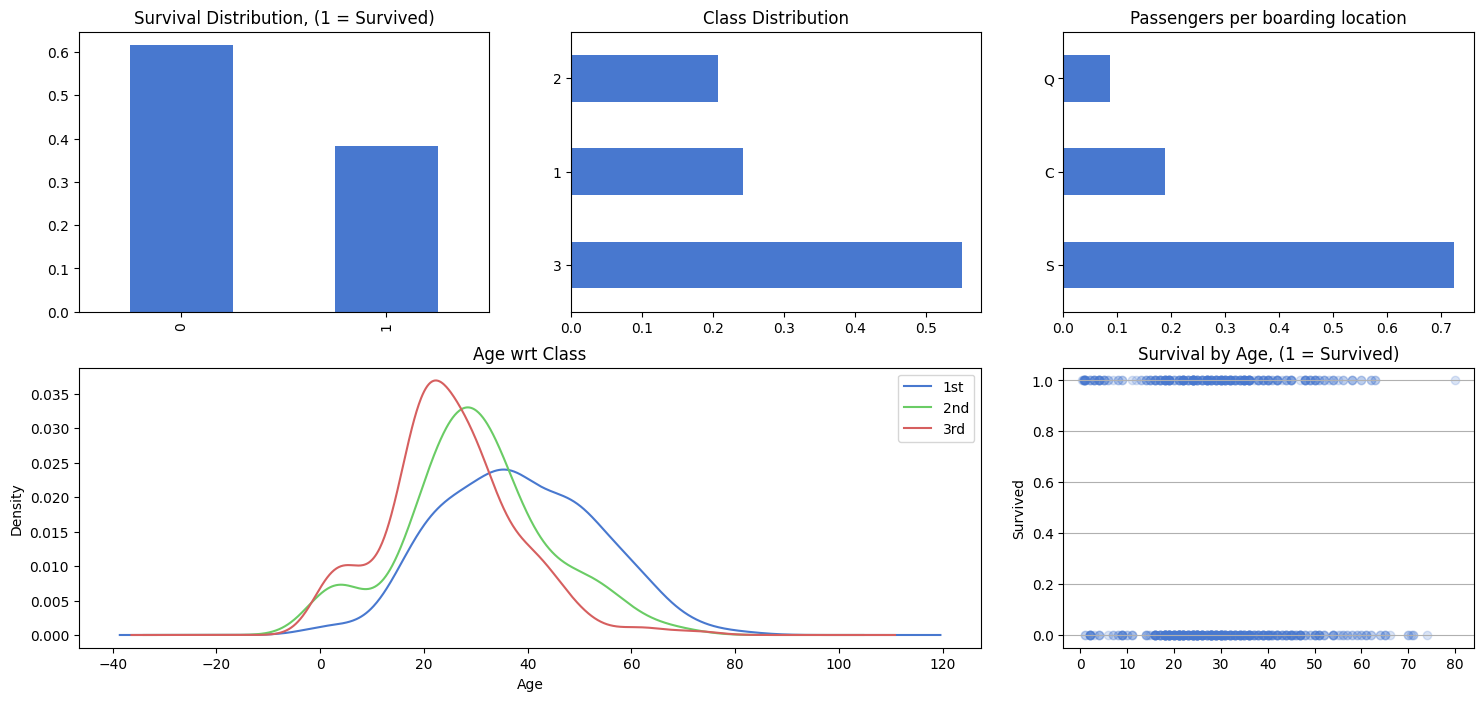

In [9]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-muted')

fig = plt.figure(figsize=(18, 8))

plt.subplot2grid((2, 3), (0, 0))
train.Survived.value_counts(normalize=True).plot(kind='bar')
plt.title("Survival Distribution, (1 = Survived)")

plt.subplot2grid((2, 3), (0, 1))
train.Pclass.value_counts(normalize=True).plot(kind='barh')
plt.title("Class Distribution")

plt.subplot2grid((2, 3), (0, 2))
train.Embarked.value_counts(normalize=True).plot(kind='barh')
plt.title("Passengers per boarding location")

plt.subplot2grid((2, 3), (1, 0), colspan=2)
for x in [1, 2, 3]:
    train.Age[train.Pclass == x].plot(kind="kde")
plt.xlabel("Age")
plt.title("Age wrt Class")
plt.legend(("1st", "2nd", "3rd"))

plt.subplot2grid((2, 3), (1, 2))
plt.scatter(train.Age, train.Survived, alpha=0.2)
plt.ylabel("Survived")
plt.grid(which='major', axis='y')
plt.title("Survival by Age, (1 = Survived)")

Text(0.07, 0.5, 'Passenger Count')

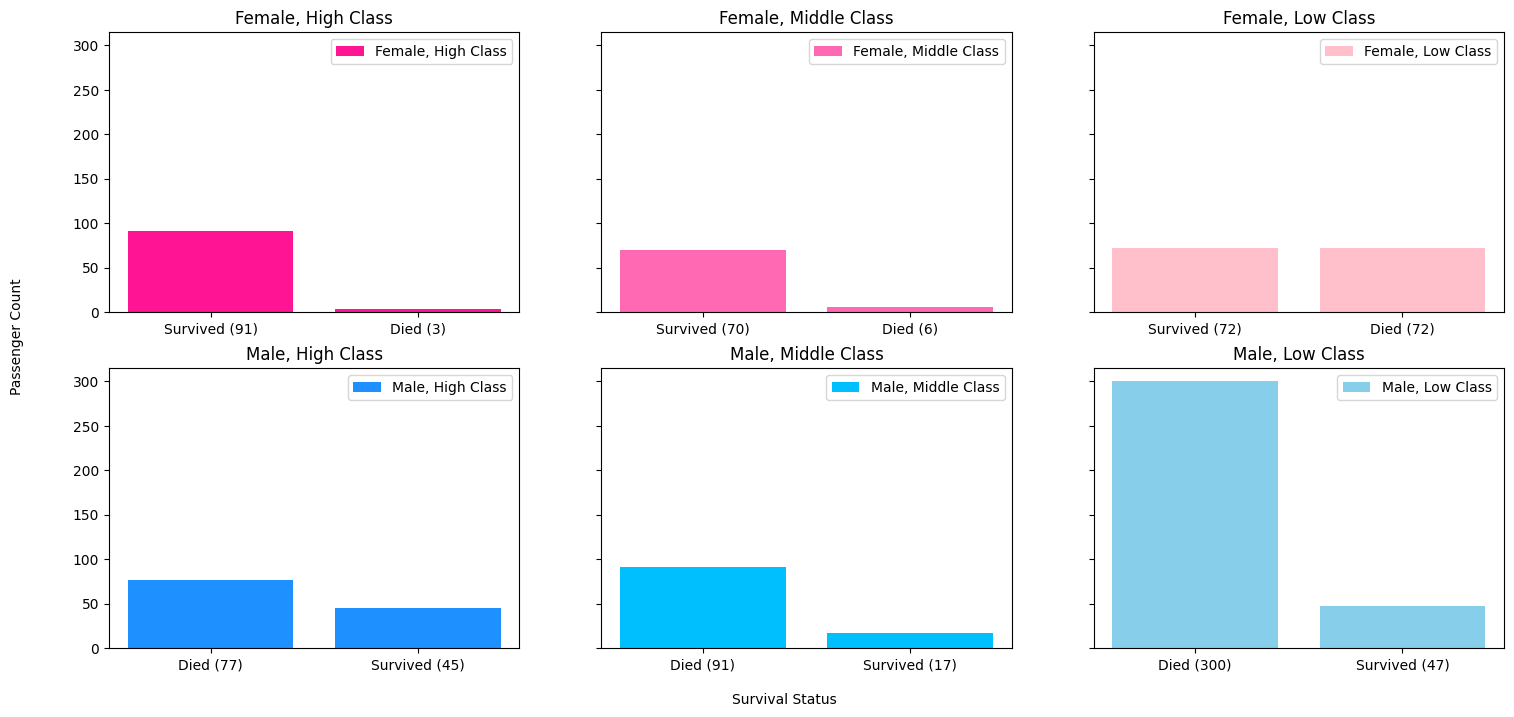

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 8), sharey=True)

colors = ['deeppink', 'hotpink', 'pink',
          'dodgerblue', 'deepskyblue', 'skyblue']
labels = ['Female, High Class', 'Female, Middle Class', 'Female, Low Class',
          'Male, High Class', 'Male, Middle Class', 'Male, Low Class']

for i, ax_row in enumerate(axes):
    for j, ax in enumerate(ax_row):
        pclass = 1 if j == 0 else 2 if j == 1 else 3
        sex = 'male' if i == 1 else 'female'
        data = train.Survived[train.Sex == sex][train.Pclass == pclass].value_counts()
        x_labels = [f'{"Survived" if k == 1 else "Died"} ({v})' for k, v in data.to_dict().items()]

        ax.bar(x_labels, data, color=colors[i*3+j], label=labels[i*3+j])
        ax.set_title(labels[i*3+j])
        ax.legend()

fig.text(0.5, 0.04, 'Survival Status', ha='center')
fig.text(0.07, 0.5, 'Passenger Count', va='center', rotation='vertical')

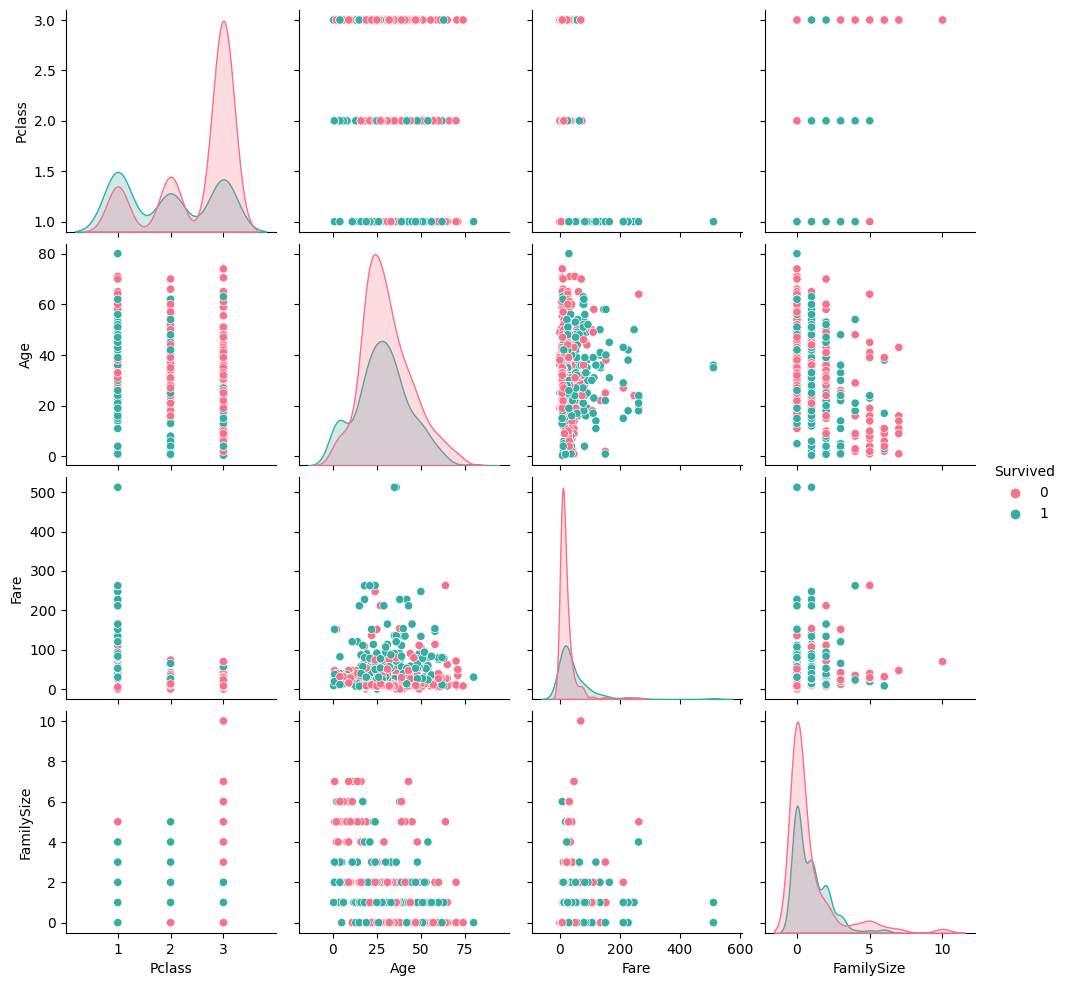

In [11]:
import seaborn as sns

sns.pairplot(x_train.drop('PassengerId', axis=1), hue='Survived', height=2.5, palette='husl')

##### Conclusions

Based on the data analysis, we can conclude that the following factors were important in determining whether a passenger survived or not:

* Gender: Females had a significantly higher survival rate than males.
* Class: Passengers in higher classes had a higher chance of survival compared to those in lower classes (third class).
* Age: Children had a higher chance of survival compared to adults.
* Family size: Passengers who were traveling alone had a lower chance of survival compared to those who were traveling with family.

As such, the initial assumptions were correct.

#### Model Selection and Training

In [12]:
x_train = x_train.drop(['Survived'], axis=1)
x_train['Age'].fillna(x_train['Age'].median(), inplace=True)
x_train['Sex'] = x_train['Sex'].map({'male': 0, 'female': 1})
x_train['Embarked'] = x_train['Embarked'].astype('category')
x_train['Embarked'] = x_train['Embarked'].cat.codes

x_test['Age'].fillna(x_test['Age'].median(), inplace=True)
x_test['Sex'] = x_test['Sex'].map({'male': 0, 'female': 1})
x_test['Fare'].fillna(x_test['Fare'].median(), inplace=True)
x_test['Embarked'] = x_test['Embarked'].astype('category')
x_test['Embarked'] = x_test['Embarked'].cat.codes

print(f'x_train info \n {x_train.info()}\n')
print(f'x_test info \n {x_test.info()}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Sex          891 non-null    int64  
 3   Age          891 non-null    float64
 4   Fare         891 non-null    float64
 5   Embarked     891 non-null    int8   
 6   FamilySize   891 non-null    int64  
dtypes: float64(2), int64(4), int8(1)
memory usage: 42.8 KB
x_train info 
 None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int8 

In [13]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV
from sklearn.ensemble import RandomForestClassifier

y_train = train['Survived']

param_grid = {
  'bootstrap': [True, False],
  'n_estimators': [100, 200, 300, 400, 500],
  'max_depth': [20, 40, 60, 80, 100, None],
  'min_samples_split': [2, 5, 10],
  'min_samples_leaf': [1, 2, 4],
}

rf = RandomForestClassifier()
halving_search = HalvingGridSearchCV(estimator=rf, param_grid=param_grid, cv=3, factor=2, n_jobs=-1)
halving_search.fit(x_train, y_train)

best_params = halving_search.best_params_

print(f'Best params: {best_params}')

Best params: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}


In [14]:
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(**best_params)
model.fit(x_train, y_train)

y_pred = model.predict(x_train)

print(f'Accuracy score: {accuracy_score(y_train, y_pred)}')

Accuracy score: 0.920314253647587
